In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

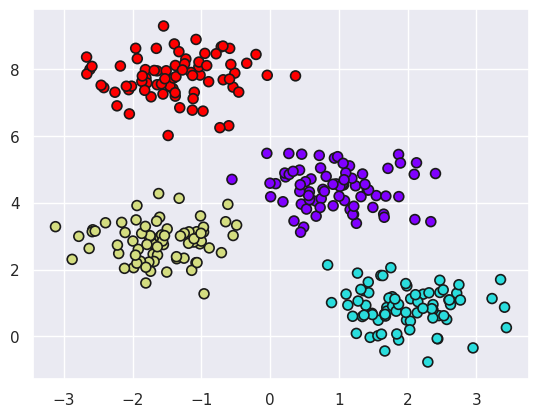

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=300, n_features=2, centers=4,
                 random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(4))

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [5]:
def visualize_classifier(model, X, y, ax=None):
  ax  = ax or plt.gca()

  model.fit(X,y)
  ax.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2, zorder=2,
             cmap=mpl.colormaps['rainbow'].resampled(4))

  xlim  = ax.get_xlim()
  ylim  = ax.get_ylim()
  x1    = np.linspace(*xlim, 30)
  y1    = np.linspace(*ylim, 30)
  xx,yy = np.meshgrid(x1,y1)
  xy    = np.c_[xx.ravel(), yy.ravel()]
  Z     = model.predict(xy).reshape(xx.shape)

  n_classes = len(np.unique(y))
  ax.contourf(xx, yy, Z, alpha=0.3, zorder=1,
              levels=np.arange(n_classes+1)-0.5,
              cmap=mpl.colormaps['rainbow'].resampled(4))

  ax.set(xlim=xlim, ylim=ylim)

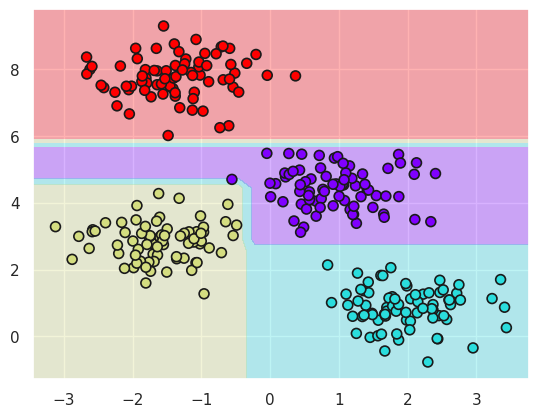

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
visualize_classifier(model, X, y)

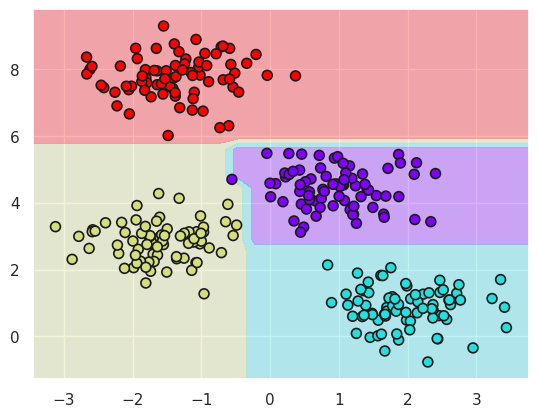

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree  = DecisionTreeClassifier()
bag   = BaggingClassifier(tree, n_estimators=300, max_samples=0.8,
                          random_state=0)
visualize_classifier(bag, X, y)

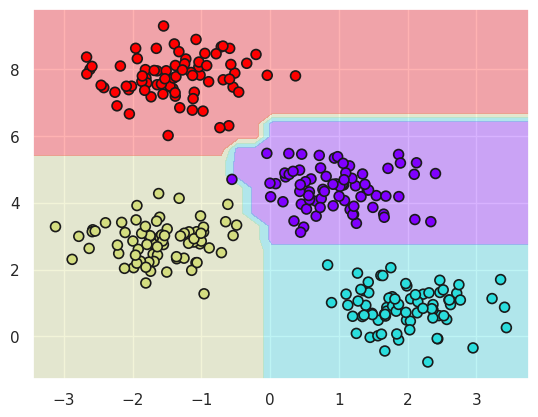

In [8]:
from sklearn.ensemble import RandomForestClassifier
forestC = RandomForestClassifier(n_estimators=300, random_state=0)
visualize_classifier(forestC, X, y)

In [9]:
rng = np.random.RandomState(42)
x   = 10*rng.rand(100)

def model(x, sigma=0.3):
  fast_osc  = np.sin(5*x)
  slow_osc  = np.sin(0.5*x)
  noise     = sigma * rng.randn(len(x))

  return fast_osc + slow_osc + noise

y = model(x)

<ErrorbarContainer object of 3 artists>

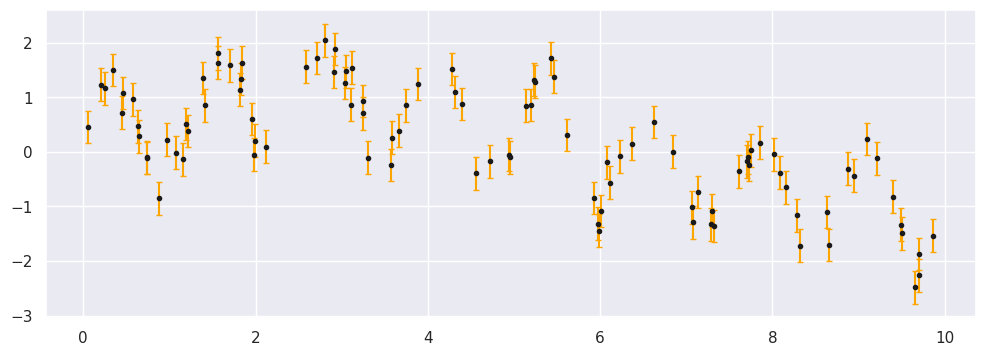

In [10]:
fig,ax = plt.subplots(figsize=(12,4))

ax.errorbar(x, y, yerr=0.3, fmt='.k',
            ecolor='orange', elinewidth=1.5, capsize=2.0)

In [11]:
from sklearn.ensemble import RandomForestRegressor

forestR = RandomForestRegressor(n_estimators=300)

X = x[:,np.newaxis]
forestR.fit(X,y)

RandomForestRegressor(n_estimators=300)

In [12]:
Xtest = np.linspace(0,10,100)[:,np.newaxis]
ypred = forestR.predict(Xtest)
ytest = model(Xtest.ravel(), sigma=0)

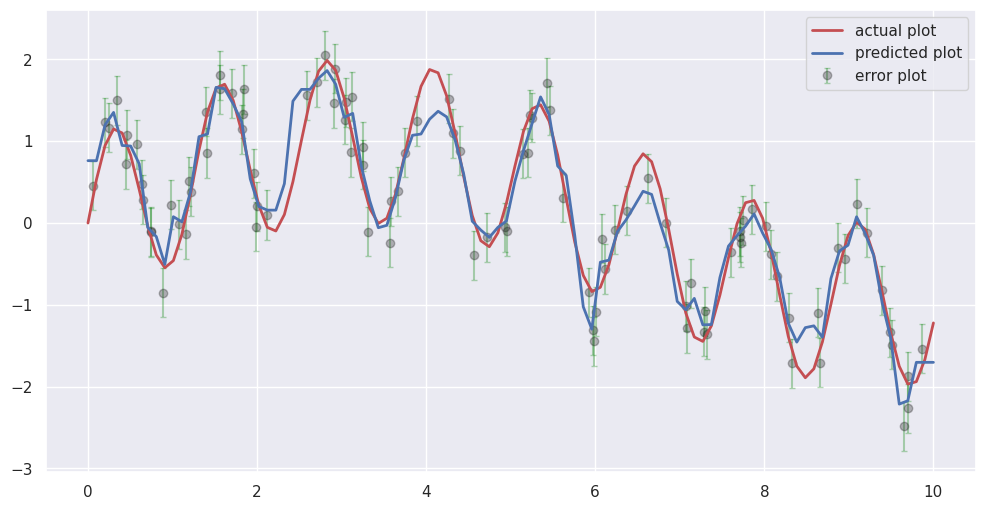

In [13]:
fig,ax = plt.subplots(figsize=(12,6))

ax.plot(Xtest.ravel(), ytest, '-r', lw=2.0, label='actual plot', zorder=2)
ax.plot(Xtest.ravel(), ypred, '-b', lw=2.0, label='predicted plot', zorder=2)
ax.errorbar(X.ravel(), y, yerr=0.3, fmt='ok', alpha=0.3,
            ecolor='green', elinewidth=1.5, capsize=2.0,
            label='error plot', zorder=1)
ax.legend(loc='best')